In [10]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv("/Users/sofielysenko/Desktop/x&y_PCA68point.csv")

In [11]:
df.head()

,Target,Image,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
0,Negative,B10NegBW,58,60,63,71,82,97,116,137,...,193,183,173,164,155,141,131,156,165,173
1,Negative,B10NegBW,131,154,176,196,216,233,244,251,...,210,215,217,219,219,217,211,209,210,209
2,Neutral,B10NeuBW,77,79,82,86,93,106,123,141,...,187,175,167,161,156,147,140,156,162,167
3,Neutral,B10NeuBW,135,154,173,191,208,222,232,240,...,209,211,212,212,212,212,208,206,207,206
4,Positive,B10PosBW,73,74,77,83,93,108,127,147,...,197,185,175,167,159,145,132,159,167,174


In [12]:
from sklearn.preprocessing import StandardScaler


features = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']
#features =['1_x','1_y','2_x', '2_y', '3_x','3_y', '4_x', '4_y']
#features = ['m_bottom','m_top', 'r_eye_top', 'l_eye_top', 'r_eye_bottom', 'l_eye_bottom']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/sofielysenko/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

In [16]:
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)

finalDf.to_csv('PCA_Outx&y4.csv')

In [17]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,Target
0,-7.488900,1.811104,-1.178520,-0.297690,0.540859,-0.393925,Negative
1,6.844290,1.416295,-1.308808,-1.087586,0.249741,0.356376,Negative
2,-7.495726,-0.346383,0.032297,-0.979494,-0.272434,-0.041441,Neutral
3,6.383445,-1.615820,-2.053494,-0.164930,-1.340732,-0.043844,Neutral
4,-6.838650,1.110482,-0.046975,-0.268101,0.757293,-0.593164,Positive


<IPython.core.display.Javascript object>


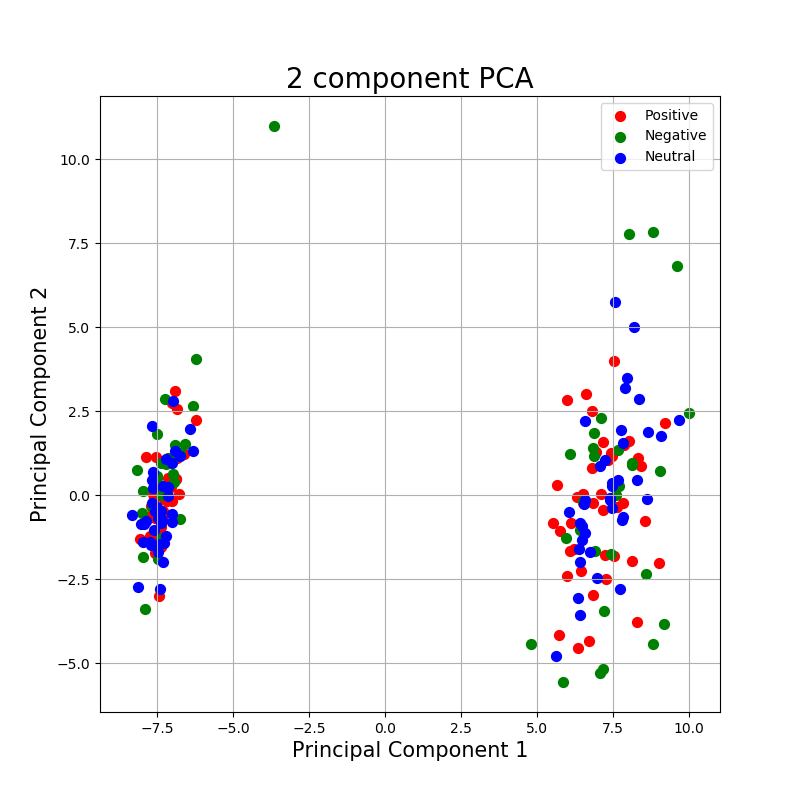

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Positive', 'Negative', 'Neutral']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


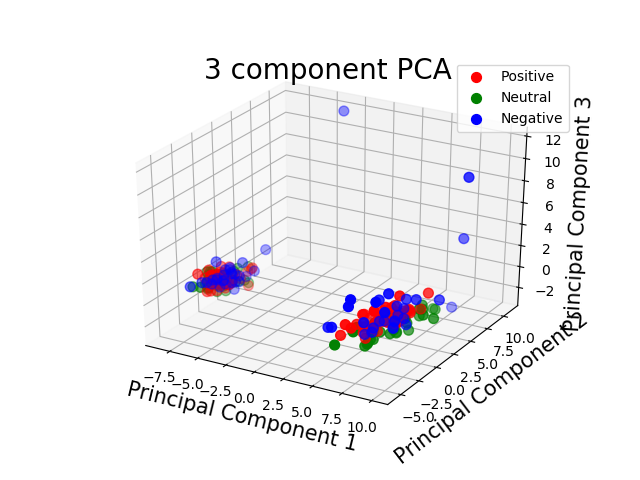

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Positive', 'Neutral', 'Negative']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [20]:
pca.explained_variance_ratio_ #77% variation

array([0.84097946, 0.07479176, 0.03743905, 0.02349006, 0.00794249,
       0.00453175])

# PCA for ML Algorithms

In [83]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
train_img = pca.fit_transform(x)

array([[ 0.05767137, -1.00675841,  0.71444782, ...,  0.04924652,
         0.47554275, -0.21985583],
       [ 0.1753755 , -0.83522661,  0.74960707, ..., -0.09513606,
         0.44788308, -0.62057595],
       [-0.57715189, -2.00543038,  1.69743923, ...,  0.14954422,
         0.50822446,  0.47340859],
       ...,
       [-1.29422324,  1.54300386,  0.44428252, ..., -1.26341248,
        -0.4917388 , -0.30421154],
       [-0.85637578,  1.55631493,  0.66131666, ..., -1.08955544,
        -0.537129  , -0.19876333],
       [-0.42973197,  1.32276337,  1.11781924, ..., -1.04809237,
        -0.44838653, -0.19110216]])

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)